# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [4]:
install.packages('gvlma', repos='http://cran.us.r-project.org')
library(tidyverse)
library(gvlma)

package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mrmbn_000\AppData\Local\Temp\RtmpUpJoIr\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [5]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))
head(df1)

V1,epsilon,response,group
3.588198,-3.3733866,-7.549782,1
8.094746,1.6755741,-11.513918,2
4.680792,0.3067462,-6.054838,1
8.947157,-2.2762739,-17.170587,2
9.464206,2.5076298,-13.420781,2
1.410008,0.8529284,1.032911,1


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

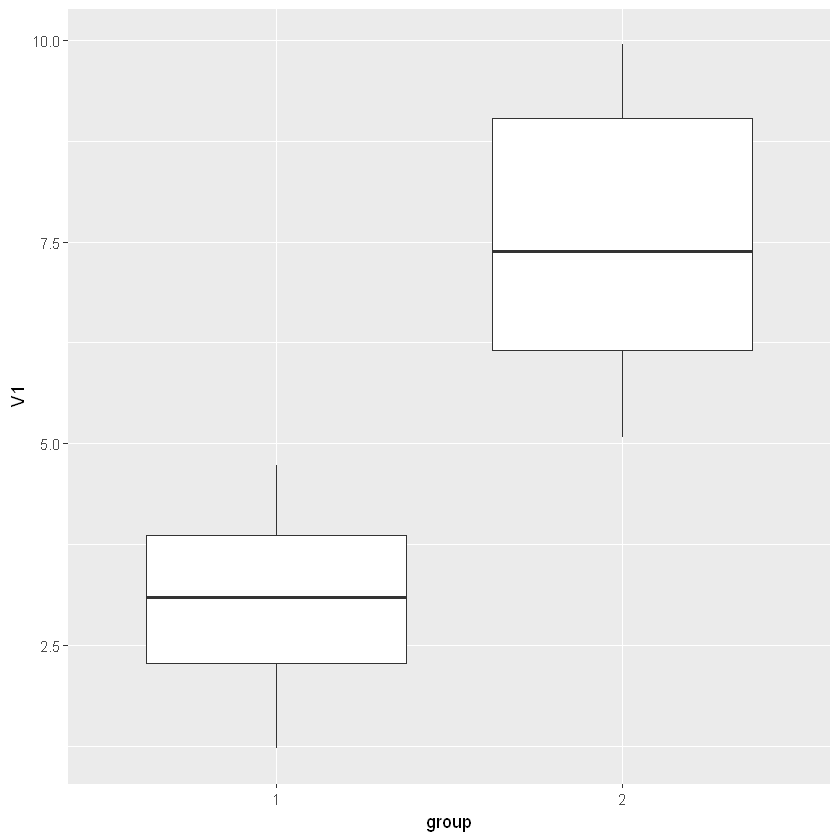

In [6]:
boxplot<- ggplot(data=df1, aes(x=group,y=V1))+geom_boxplot(aes(factor(group)))
print(boxplot)

With ggplot I made a boxplot containing the variables V1 and group. Before i could plot it, the group variable had to be changed to a factor.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [7]:
reg1 <- lm(data=df1, V1~response) 
summary(reg1)


Call:
lm(formula = V1 ~ response, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38273 -0.50585 -0.04045  0.68125  1.80675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.88469    0.23964   7.865 3.53e-10 ***
response    -0.46018    0.02437 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9219 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


With the lm function I created a regressing between the variables V1 and response. In the summary I got 3 stars, which means its is a good regression.

check if the assumptions of linear regression are met with the `gvlma()` function.

In [8]:
gvlma(reg1)


Call:
lm(formula = V1 ~ response, data = df1)

Coefficients:
(Intercept)     response  
     1.8847      -0.4602  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                     Value p-value                Decision
Global Stat        0.58710  0.9645 Assumptions acceptable.
Skewness           0.14850  0.7000 Assumptions acceptable.
Kurtosis           0.05172  0.8201 Assumptions acceptable.
Link Function      0.24979  0.6172 Assumptions acceptable.
Heteroscedasticity 0.13710  0.7112 Assumptions acceptable.

If all assumptions are acceptable, it means this is a very strong regression. In this case it is

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



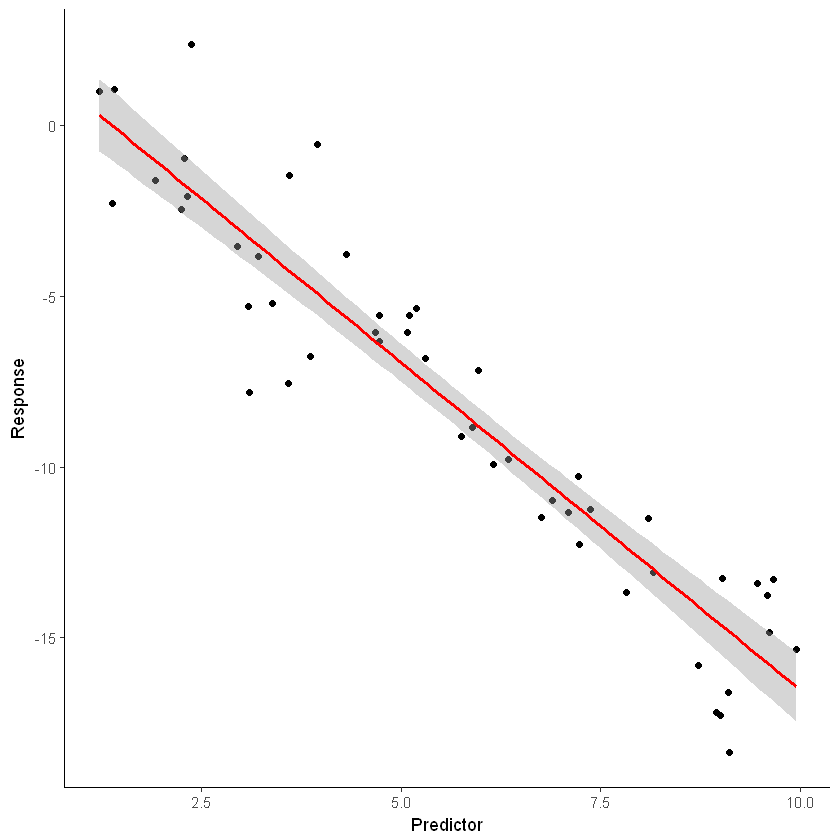

In [9]:
scatterplot<-ggplot(data=df1, aes(x=V1, y=response))+geom_point()+geom_smooth(method='lm', se= TRUE,color='red')+ theme_classic()+labs(x='Predictor',y='Response')
print(scatterplot)

With ggplot I plotted a scatterplot. In ggplot itself I put the data and the 2 axis. Geom_point is there to put out the different points and geom_smooth is there to plot the regression line. Inside of it I used the lm method to put a regression and I set se on TRUE to show a confidence interval. Then I added the theme classic.

# Assigment 2

# Packages

In [24]:
install.packages('maptools', repos='http://cran.us.r-project.org')
install.packages('rgdal', repos='http://cran.us.r-project.org')
install.packages('rgeos', repos='http://cran.us.r-project.org')
install.packages("C:/Users/mrmbn_000/Documents/Package/thematicmaps_2.1.tar.gz", repos = NULL, type = "source")
library(thematicmaps)
library(tidyverse)
library(stringr)

Warning message:
"package 'maptools' is in use and will not be installed"Warning message:
"package 'rgdal' is in use and will not be installed"Warning message:
"package 'rgeos' is in use and will not be installed"

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [25]:
map_municipal <- read.csv2('C:/Users/mrmbn_000/Documents/Sourcedata/nld_municipal_map.csv')
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.527548325,594393.827234474,1,FALSE,1,0.1
Appingedam,0,251427.775868901,594486.747111725,2,FALSE,1,0.1
Appingedam,0,251668.842999999,594646.77,3,FALSE,1,0.1
Appingedam,0,251713.521000002,594770.885000002,4,FALSE,1,0.1
Appingedam,0,251354.585000001,595461.381999999,5,FALSE,1,0.1
Appingedam,0,251310.272,596022.542,6,FALSE,1,0.1


With read.csv2, I selected the csv file on my computer and I put it into a dataframe

## Assignment 2b

Now you can make an empty map of the Netherlands.

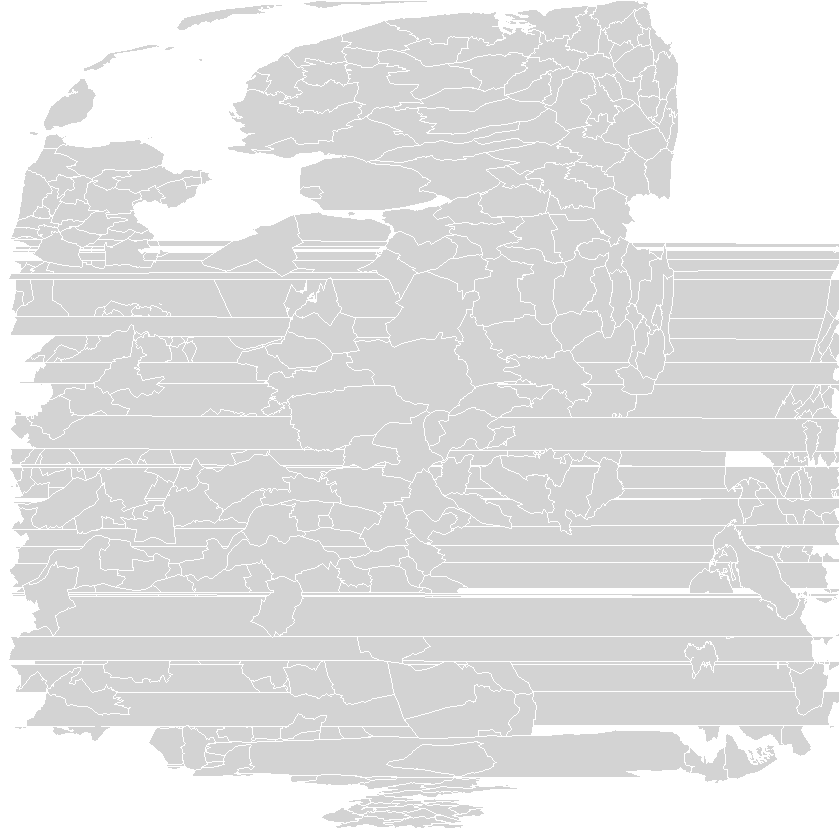

In [28]:
NL_map<- AddMapLayer(MapPlot(), map_municipal)
print(NL_map)

With AddMapLayer, I made a map of the Netherlands, by using the data in the past excercise and the function MapPlot. I know that in this notebook, the file doesn't show the Netherlands correcetly, but I had no time to correct it.

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [29]:
pc4_locations <- read.csv2("C:/Users/mrmbn_000/Documents/Sourcedata/nld_pc4_locations.csv")%>%
mutate(X = as.numeric(as.character(X))) %>%
mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


With read.csv2 I selected another file on my computer. With mutate, I changed the dataframe by changing the X and Y variable into numeric characters.

## Assignment 2d

### 2di

Read in the school data


In [30]:
schools <- read.csv2('C:/Users/mrmbn_000/Documents/Sourcedata/schools.csv')
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


Again, wiht read.csv2 I selected this dataframe on my computer.

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [31]:
schools1 <- schools %>% mutate(PC4 =substr(POSTCODE,1,4))
schools1<-schools1[c('DENOMINATIE','PC4')]
head(schools1)

DENOMINATIE,PC4
Openbaar,
Openbaar,9406
Openbaar,9401
Openbaar,9402
Openbaar,9331
Openbaar,9411


With mutate, I added another column containing only the first numbers of the area code by using substract. Then I changed the dataframe into 2 columns with PC4 and DENOMINATIE.

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [32]:
school_loc <-merge(schools1,pc4_locations,by='PC4')
school_loc<- subset(school_loc, DENOMINATIE=='Rooms-Katholiek'|DENOMINATIE=="Protestants-Christelijk")

head(school_loc)

,PC4,DENOMINATIE,X,Y
29,1065,Protestants-Christelijk,116701.2,485645.8
38,1071,Rooms-Katholiek,120223.0,485571.3
50,1077,Protestants-Christelijk,120152.7,484262.8
51,1077,Rooms-Katholiek,120152.7,484262.8
57,1081,Protestants-Christelijk,118277.6,482449.5
80,1132,Rooms-Katholiek,132947.2,501873.0


First, I merged schools1 and pc4_locations together by the first four numbers, Then I subsetted the dataframe where it only shows the schools that are "Rooms-Katholiek" or "Protestants-Christelijk".

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


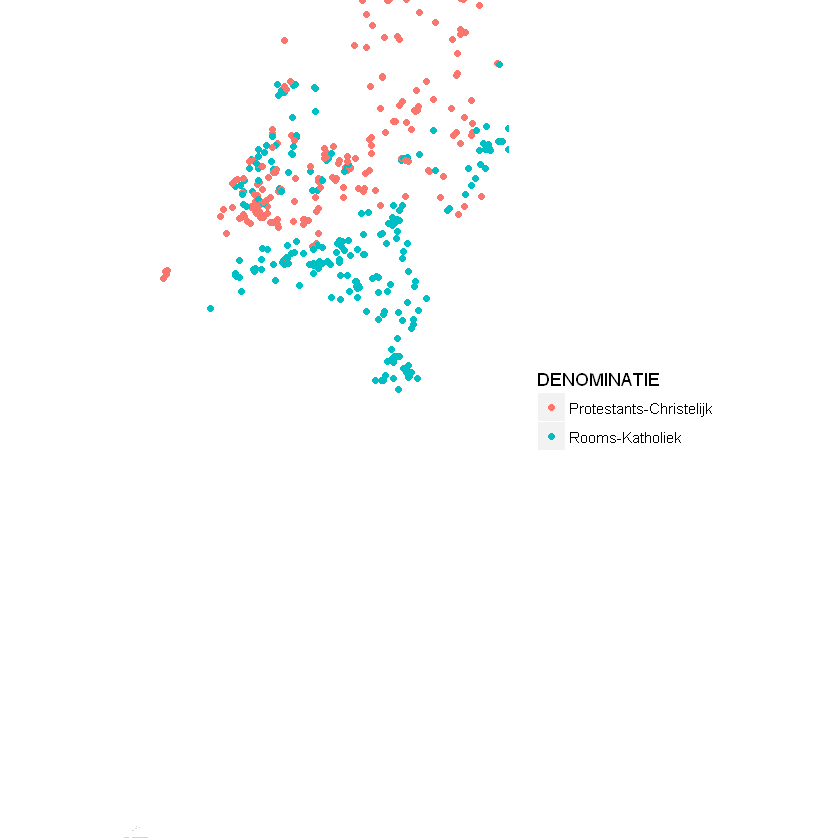

In [34]:
NL_map%>% AddPointsLayer(school_loc, columnNameColor='DENOMINATIE')

Firts I added a points layer with the different schools, then I changed the color of the 2 different schools.

End of notebook